<a href="https://colab.research.google.com/github/aishwary247/Deep-Learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
            noise = 0.03,
            random_state = 42)

In [ ]:
print(f"X[:5] = {X[:5]}")
print(f"y[:5] = {y[:5]}")

X[:5] = [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
y[:5] = [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0],
                       "X2": X[:,1],
                       "labels" : y})
#circles[:10]
circles.head(10)

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


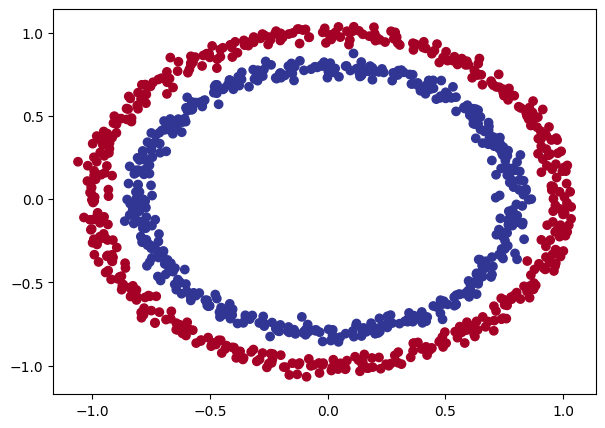

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(x = X[:,0],
            y = X[:,1],
            c= y,
            cmap = plt.cm.RdYlBu)


In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
import torch

#Turn data into tensors and create train and test splits

In [ ]:
X = torch.from_numpy(X).type(torch.float)
#changing type to float32 which is default dtype of pytorch
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# train and test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

#Building the model

In [ ]:
import torch
from torch import nn

#setting up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=5 )
    self.layer_2 = nn.Linear(in_features=5, out_features=1 )

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModel()
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.2698, -0.1872],
        [ 0.2837, -0.1051],
        [ 0.6400, -0.5828],
        [-0.3763, -0.4180],
        [-0.3433,  0.2768]], requires_grad=True)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2698, -0.1872],
                      [ 0.2837, -0.1051],
                      [ 0.6400, -0.5828],
                      [-0.3763, -0.4180],
                      [-0.3433,  0.2768]])),
             ('layer_1.bias',
              tensor([ 0.3654,  0.5125, -0.1792,  0.6867,  0.5323])),
             ('layer_2.weight',
              tensor([[-0.2554,  0.2882,  0.2685, -0.3323, -0.1541]])),
             ('layer_2.bias', tensor([0.0416]))])

In [ ]:
#replicating above model using nn.sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2 , out_features= 5),
    nn.Linear(in_features=5, out_features=1)
)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2229,  0.5928],
                      [ 0.0734, -0.6309],
                      [ 0.3320,  0.6987],
                      [-0.1014,  0.0697],
                      [ 0.1402,  0.0122]])),
             ('0.bias', tensor([-0.6703,  0.2777,  0.1889,  0.2532,  0.1288])),
             ('1.weight',
              tensor([[-0.4396,  0.2776,  0.0391, -0.2444, -0.0137]])),
             ('1.bias', tensor([-0.0917]))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test)

print(torch.round(untrained_preds[:5]))
print(f"\n y_testlabels: {y_test[:5]}")

tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [1.]])

 y_testlabels: tensor([1., 0., 1., 0., 1.])


In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  accuracy = (correct/len(y_pred)) * 100
  return accuracy

Setting up loss function and optimizer

In [ ]:
# Setting up loss function and optimiser
loss_fn = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)


In [ ]:
y_logits = model_0(X_test)
y_preds = torch.sigmoid(y_logits)     # sigmoid function brings the logits into the range of 0 to 1 which act as probability predictions
y_preds_labels = torch.round(y_preds) #if ypreds[] >= 0.5 -> label = 1 else if y_preds < 0.5 -> label = 0
print(y_logits[:5])
print(y_preds[:5])
print(y_preds_labels[:5])

tensor([[-0.0512],
        [-0.1855],
        [ 0.3870],
        [-0.1756],
        [ 0.5234]], grad_fn=<SliceBackward0>)
tensor([[0.4872],
        [0.4538],
        [0.5956],
        [0.4562],
        [0.6280]], grad_fn=<SliceBackward0>)
tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], grad_fn=<SliceBackward0>)


#Training and testing loop
1. Forward pass
2. Calculate the loss
3. Set Gradient to zero
4. Back propagation
5. Optimiser

In [ ]:
epochs = 100
for epoch in range (epochs):
  model_0.train()

  # 1. Forward pass
  y_logit = model_0(X_train).squeeze()

  # 2. Calculate the loss
  loss = loss_fn(y_logit,  # BCE.logit loss accepts y_logit as input
                 y_train)
                          # loss = loss_fn(torch.sigmoid(y_logit), y_train). if loss_fn = nn.BCELoss. It accepts prediciton probablities as inputs

  # 3. Optimise zero grad

  optimiser.zero_grad()

  # 4. Back propagation

  loss.backward()

  # 5. Optimise step(gradient descent)

  optimiser.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    y_logit_test = model_0(X_test).squeeze()

    test_loss = loss_fn(y_logit_test, y_test)

    accuracy = accuracy_fn(y_true = y_test,
                           y_pred = torch.round(torch.sigmoid(y_logit_test)))

  if epoch%10 == 0 :
    print(f"Epoch: {epoch} | loss: {loss} | Test loss: {test_loss} | Accuracy: {accuracy} ")


Epoch: 0 | loss: 0.7113339900970459 | Test loss: 0.6971126794815063 | Accuracy: 53.5 
Epoch: 10 | loss: 0.7028037905693054 | Test loss: 0.692657470703125 | Accuracy: 55.00000000000001 
Epoch: 20 | loss: 0.6990046501159668 | Test loss: 0.6913228631019592 | Accuracy: 54.0 
Epoch: 30 | loss: 0.6970562934875488 | Test loss: 0.6910473704338074 | Accuracy: 53.5 
Epoch: 40 | loss: 0.6959167718887329 | Test loss: 0.69114089012146 | Accuracy: 54.0 
Epoch: 50 | loss: 0.6951765418052673 | Test loss: 0.6913631558418274 | Accuracy: 52.5 
Epoch: 60 | loss: 0.6946596503257751 | Test loss: 0.6916272044181824 | Accuracy: 52.5 
Epoch: 70 | loss: 0.694282054901123 | Test loss: 0.6919001936912537 | Accuracy: 51.5 
Epoch: 80 | loss: 0.6939991116523743 | Test loss: 0.6921685934066772 | Accuracy: 50.0 
Epoch: 90 | loss: 0.6937838792800903 | Test loss: 0.6924259066581726 | Accuracy: 50.5 


#Making predictions and evaluating the model

#Importing Helper functions
We will try to visualise the model through helper functions

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper functions file already exists")
else:
  print("Downloading helper_functions file ")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


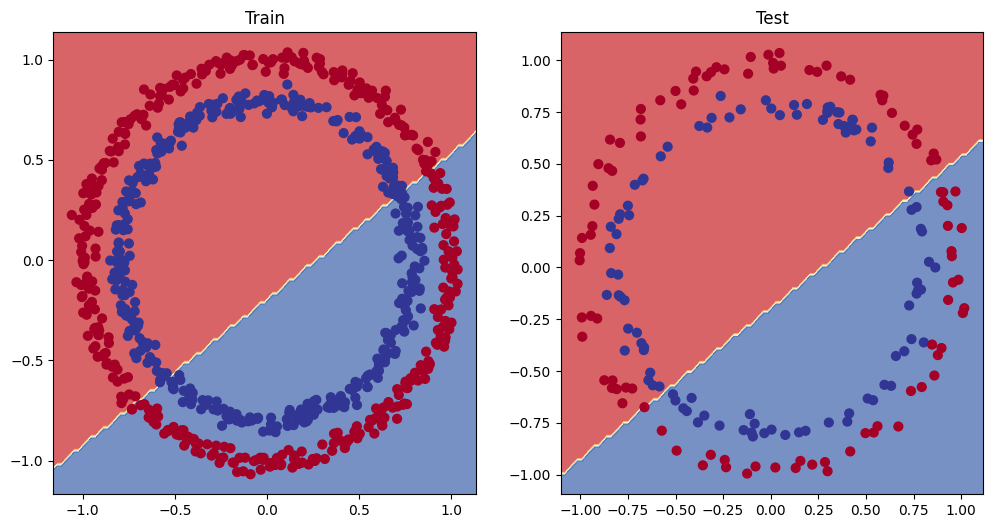

In [ ]:
# Plot decision boundary of model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#Improving the model
1. Adding more layers
2. Adding more hidden units
3. Fit for longer
4. Change activation fucntion
5. Change learning rate
7. Change the loss function


# Non Linear model


In [ ]:
class CircleModelR(nn.Module) :
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features =10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [ ]:
model_3 = CircleModelR().to(device)
model_3

CircleModelR(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000
for epoch in range(epochs):
  ## training
  model_3.train()

  # 1.Forward Pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2.Calculate the loss
  loss = loss_fn(y_logits,y_train) #BCEwithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  # 3.Optimise zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ## Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                        y_pred = test_pred)

  # Print out whats happening
  if epoch % 100 == 0 :
    print(f"Epoch : {epoch} | Loss : {loss:.4f}, Acc: {acc:.2f} | Test loss: {test_loss:.4f}, Test acc:{test_acc:.2f} ")

Epoch : 0 | Loss : 0.6960, Acc: 50.00 | Test loss: 0.6987, Test acc:50.00 
Epoch : 100 | Loss : 0.6883, Acc: 64.88 | Test loss: 0.6895, Test acc:65.50 
Epoch : 200 | Loss : 0.6857, Acc: 60.50 | Test loss: 0.6867, Test acc:57.50 
Epoch : 300 | Loss : 0.6822, Acc: 60.75 | Test loss: 0.6835, Test acc:58.00 
Epoch : 400 | Loss : 0.6772, Acc: 60.88 | Test loss: 0.6790, Test acc:57.00 
Epoch : 500 | Loss : 0.6679, Acc: 62.88 | Test loss: 0.6725, Test acc:61.50 
Epoch : 600 | Loss : 0.6532, Acc: 64.12 | Test loss: 0.6608, Test acc:60.00 
Epoch : 700 | Loss : 0.6266, Acc: 70.88 | Test loss: 0.6378, Test acc:70.50 
Epoch : 800 | Loss : 0.5725, Acc: 88.62 | Test loss: 0.5854, Test acc:85.00 
Epoch : 900 | Loss : 0.4746, Acc: 94.75 | Test loss: 0.4924, Test acc:92.00 


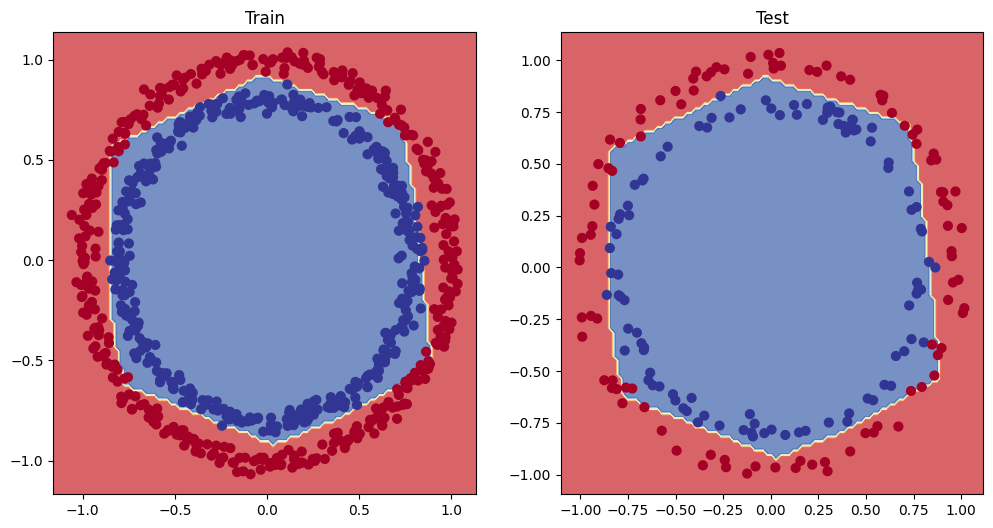

In [ ]:
# Plot Decision Boundary
plt.figure(figsize= (12,6))
plt.subplot(1,2,1) #no. of rows, no. of columns, index of plot
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test,y_test )

# Multi class classification

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [ ]:
from torch import nn

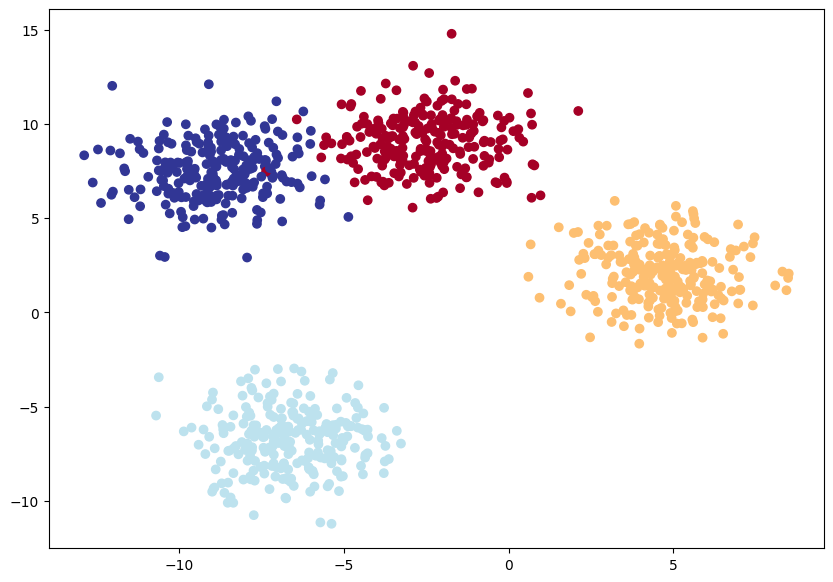

In [ ]:
# Creating toy dataset
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers= NUM_CLASSES,
                            cluster_std= 1.5,
                            random_state = RANDOM_SEED)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state = RANDOM_SEED)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c = y_blob, cmap= plt.cm.RdYlBu)

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    super().__init__()
  # arg : hidden units (default 8)
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features= input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

In [ ]:
model_4 = BlobModel(input_features = 2,
                    output_features= 4 ,
                    hidden_units = 8).to(device)

In [ ]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  accuracy = (correct/len(y_pred)) * 100
  return accuracy

Loss function and optimiser for multiclass classification

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params= model_4.parameters(),
                            lr = 0.1)

In [ ]:
model_4.eval()
with torch.inference_mode() :
  y_logits = model_4(X_blob_train)
y_logits

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        ...,
        [-0.2564, -1.2652, -1.0365, -0.3130],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.0502, -0.8423, -0.4798, -0.0988]])

In [ ]:
y_pred_prob = torch.softmax(y_logits, dim =1)
y_pred_prob

tensor([[0.3080, 0.3328, 0.1441, 0.2150],
        [0.3577, 0.1324, 0.1696, 0.3402],
        [0.3011, 0.1843, 0.2823, 0.2323],
        ...,
        [0.3613, 0.1317, 0.1656, 0.3414],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3272, 0.1482, 0.2129, 0.3117]])

In [ ]:
torch.sum(y_pred_prob[0])

tensor(1.)

In [ ]:
y_pred = torch.argmax(y_pred_prob, dim = 1)
y_pred[:10]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
A = torch.tensor([[1,2,3],
                 [4,5,6],
                 [7,8,9]])
A.sum(dim=1)

tensor([ 6, 15, 24])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim =1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                 y_pred = y_pred )

  # 3. Optimise zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  # Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits,dim =1 ).argmax(dim = 1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                        y_pred = test_preds)

  if epoch%10 == 0 :
    print(f" Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")

 Epoch: 0 | Loss: 1.1588, Acc: 40.38 | Test loss: 1.0755, Test Accuracy: 48.00
 Epoch: 10 | Loss: 0.6448, Acc: 96.75 | Test loss: 0.6607, Test Accuracy: 97.50
 Epoch: 20 | Loss: 0.4254, Acc: 98.50 | Test loss: 0.4307, Test Accuracy: 100.00
 Epoch: 30 | Loss: 0.2529, Acc: 99.12 | Test loss: 0.2451, Test Accuracy: 99.50
 Epoch: 40 | Loss: 0.1123, Acc: 99.25 | Test loss: 0.1023, Test Accuracy: 99.50
 Epoch: 50 | Loss: 0.0663, Acc: 99.25 | Test loss: 0.0585, Test Accuracy: 99.50
 Epoch: 60 | Loss: 0.0507, Acc: 99.25 | Test loss: 0.0429, Test Accuracy: 99.50
 Epoch: 70 | Loss: 0.0430, Acc: 99.25 | Test loss: 0.0349, Test Accuracy: 99.50
 Epoch: 80 | Loss: 0.0384, Acc: 99.25 | Test loss: 0.0299, Test Accuracy: 99.50
 Epoch: 90 | Loss: 0.0352, Acc: 99.25 | Test loss: 0.0266, Test Accuracy: 99.50


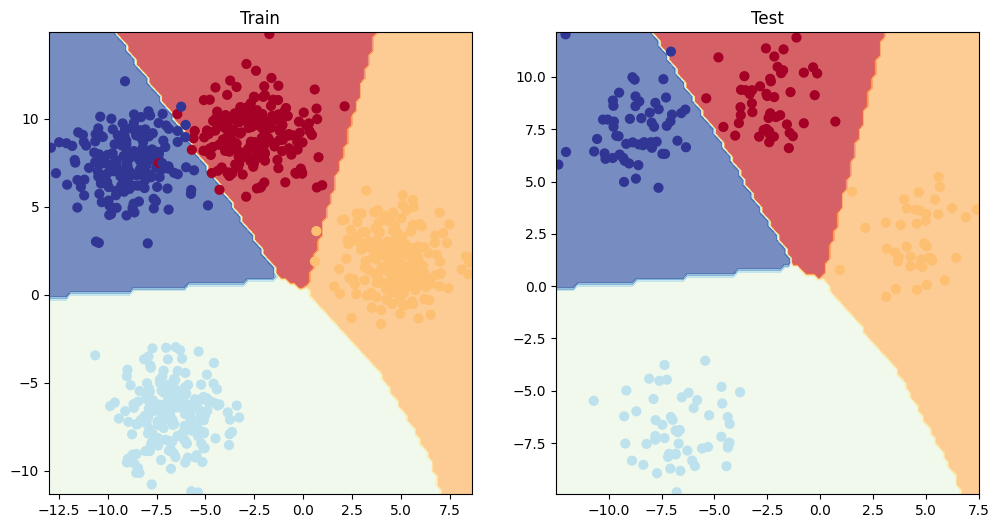

In [ ]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

# A few more Classification Metrics..(to evaluate our classification model)
* Accuracy
* Precision
* Recall
* F1- score
* Confusion matrix
* Classfication report